## Limpieza de Datos

In [15]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [16]:
# Datasets

db = pd.read_csv('Datos Originales/train.csv')
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Estadistica descriptiva

db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Visualizacion

In [18]:
# Paleta de colores

a, b, c=[plt.cm.Blues, plt.cm.Greens, plt.cm.Reds]

##### Gráfica de supervivencia contra sexo

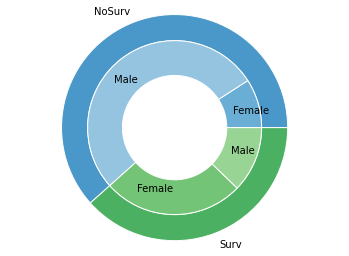

In [19]:
# Círculo externo
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(db.Survived.value_counts(), radius=1.3,
                  labels=['NoSurv', 'Surv'], colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Círculo interno
mypie2, _ = ax.pie(db.groupby(['Survived','Sex'])['Sex'].count(), radius=1.3-0.3, labels=['Female','Male','Female','Male'],
                   labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

##### Gráfica de supervivencia contra clase

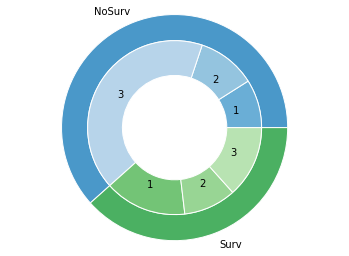

In [20]:
 # Círculo externo
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(db.Survived.value_counts(), radius=1.3,
                  labels=['NoSurv', 'Surv'], colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Círculo interno
mypie2, _ = ax.pie(db.groupby(['Survived','Pclass'])['Pclass'].count(), radius=1.3-0.3, labels=['1','2','3','1','2','3'],
                   labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

##### Segmentación por Puertos de Embarcación (embarked)

In [21]:
# Caracteristicas de los pasajeros de cada puerto

print(db['Embarked'].value_counts())

print("Valores NaN's: ", db.Embarked.isna().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Valores NaN's:  2


Text(0.5, 1.0, 'Queenstown')

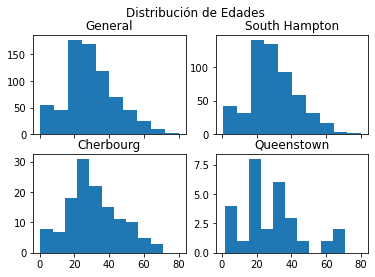

In [22]:
fig, ax = plt.subplots(2, 2, sharex='col')
fig.suptitle('Distribución de Edades')

ax[0,0].hist(db['Age'])
ax[0,0].set_title('General')
ax[1,0].hist(db[db.Embarked == 'C']['Age'])
ax[1,0].set_title('Cherbourg')
ax[0,1].hist(db[db.Embarked == 'S']['Age'])
ax[0,1].set_title('South Hampton')
ax[1,1].hist(db[db.Embarked == 'Q']['Age'])
ax[1,1].set_title('Queenstown')

In [23]:
# Cambiar el lugar de embarcacion por una variable cuantitativa donde S: 0, C: 1, Q: 2

db['Embarked'] = db['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

# Cambiar el sexo de los pasajeros por valores cuantitativos donde female: 0, male: 1
db['Sex'] = db['Sex'].replace({'female': 0, 'male': 1})

db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [24]:
# Correlacion entre Embarked y Survived

db['Embarked'].corr(db['Survived'])

0.10866867101787421

In [25]:
# Eliminacion de columnas que no aportan informacion importante: Cabin, PassengerId, Name, Ticket

db.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,NaN,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0
